# function estimation using neural network
## we are going to estimate y=F(x)
### amir 2020

In [2]:
# import ......
#
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot as plt
%matplotlib inline 

-50.0 50.00000000000142 5.048709793414476e-25 2500.000000000142


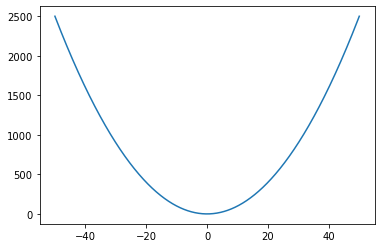

In [3]:
# define the dataset
# input, x 
x = np.arange(-50,50.1,0.1)
# for Y, we can have different functions of x, but mind the math and div by zero etc
#
# y = asarray([i**3-2*i**2  for i in x ])
# y = asarray([(i-1.0)/(2*i+1.0)  for i in x if (i != -0.5)])
y = asarray([i**2  for i in x ])
print(x.min(), x.max(), y.min(), y.max())
plt.plot(x,y)
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))



0.0 1.0 0.0 1.0


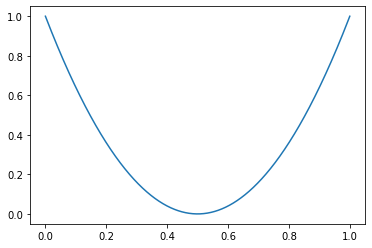

In [4]:
# normalization
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
plt.plot(x,y)

In [5]:
# design the neural network model
model = Sequential()
# defining the input layer
model.add(Dense(10, input_dim=1, activation='sigmoid' , kernel_initializer='he_uniform')) 
# defining the hidden layers 
model.add(Dense(5, activation='sigmoid', kernel_initializer='he_uniform'))
#model.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
# defining the output layer
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# fit/train the model on the training dataset
model.fit(x, y, epochs=100, batch_size=10, verbose=1)
# make predictions for the input data
yhat = model.predict(x)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-10-17 09:26:36.291066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-17 09:26:36.291202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-17 09:26:36.382402: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 11/101 [==>...........................] - ETA: 0s - loss: 0.0957 

2022-10-17 09:26:36.553639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 1s 5ms/step - loss: 0.0907
Epoch 2/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0895
Epoch 3/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0895
Epoch 4/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0882
Epoch 5/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 6/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0874
Epoch 7/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0856
Epoch 8/100
101/101 [==============================] - 1s 5ms/step - loss: 0.0853
Epoch 9/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0845
Epoch 10/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0832
Epoch 11/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0824
Epoch 12/100
101/101 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 13/100
101/101 [===

2022-10-17 09:27:23.773021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


MSE::: 6452.789
Root MSE::: 80.329
MAE::: 62.794


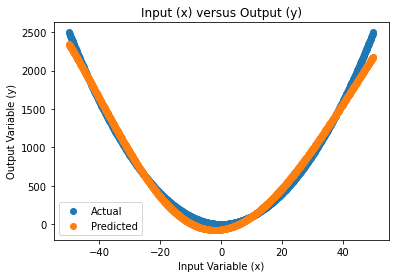

In [6]:
# inverse transforms, to get back from 
# normalized to original data
#
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

# report model error
print('MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot))
print('Root MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y_plot, yhat_plot))
# plot x vs y, target output, blue
plt.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat, NN output, predicted, orange
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

In [6]:
''' 
now, you may try this using
1- different functions
2- different ANN structures (layers, neurons)
3- different activation functions
4- different training epochs
5- with or without normalization

'''

' \nnow, you may try this using\n1- different functions\n2- different ANN structures (layers, neurons)\n3- different activation functions\n4- different training epochs\n5- with or without normalization\n\n'